## Exploratory Data Analysis
*for Loan Default Prediction project*

#### Load Packages

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
import requests
import io

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
import numpy as np

#### Load Data

Raw Data downloaded from https://www.kaggle.com/wordsforthewise/lending-club. Too large to fit in GitHub.

In [2]:
import gzip
with gzip.open('Data/accepted_2007_to_2018Q4.csv.gz', 'rb') as f:
    for i, l in enumerate(f):
        pass
print("File contains {0} lines".format(i + 1))

File contains 2260702 lines


In [3]:
filename = 'Data/accepted_2007_to_2018Q4.csv.gz'
df = pd.read_csv(filename, compression='gzip', header=0)

C:\Users\ssear\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [5]:
df.shape

(2260701, 151)

In [6]:
df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

### Clean Dataset

This dataset has information on both current and past loans. For this project, we are only interested in loans which have a final outcome - fully paid or charged off. 

In this project I am using the loan amount to help predict the likelihood that the loan is paid in full. However, I also want to provide a return on investment given the loan was funded fully. If the loan wasn't funded fully, the ROI would be lower. However, the model isn't meant to predict how much to invest, it is predicting whether to invest. Therfore, I will only consider loans that were funded fully.  

This dataset also just has too many variables to analyze within a short period of time. For this reason, only the first 60 variables were analyzed and considered. All other's were dropped.  

For the variables that were analyzed, we are only interested in variables that would be avaiable at the origination of the loan to an investor. Variables that leak future information, are redundant, or that are not useful, and thus need to be dropped, were determined from a [dataquest](https://www.dataquest.io/blog/machine-learning-preparing-data/) blog.

In [5]:
# Only consider loans with the outcome of charged off or fully paid
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]
mapping = {'loan_status':{'Fully Paid': 1, 'Charged Off': 0}}
df = df.replace(mapping)

# Only consider loans that were funded fully
df = df[df['loan_amnt'] == df['funded_amnt_inv']]

# Drop columns after acc_now_delinq for simplicity
df = df.loc[:,:'acc_now_delinq']

columns_to_drop = ['id', # Not useful
                   'member_id', # Not useful
                   # 'loan_amnt',
                   'funded_amnt', # Redundant
                   'funded_amnt_inv', # Redundant
                   # 'term',
                   'int_rate', # Information contained in grade
                   # 'installment',
                   # 'grade',
                   'sub_grade', # Redundant
                   'emp_title', # Hard to make useful
                   # 'emp_length',
                   # 'home_ownership',
                   # 'annual_income',
                   # 'verification_status',
                   # 'issue_d', # Will delete later
                   # 'loan_status',
                   'pymnt_plan', # Future information
                   'url', # Not useful
                   'desc', # Hard to make useful
                   # 'purpose',
                   'title', # Redundant
                   'zip_code', # Masked
                   # 'addr_state',
                   # 'dti',
                   # 'delinq_2yrs',
                   # 'earliest_cr_line',
                   # 'fico_range_low',
                   # 'fico_range_high',
                   # 'inq_last_6mths',
                   'mths_since_last_delinq', # Lots of missing data
                   'mths_since_last_record', # Lots of missing data
                   # 'open_acc',
                   # 'pub_rec',
                   # 'revol_bal',
                   # 'revol_util',
                   # 'total_acc',
                   'initial_list_status', # Not a lot of information on what this means
                   'out_prncp', # Future info
                   'out_prncp_inv', # Future info
                   # 'total_pymnt', # Will use in evaluation
                   'total_pymnt_inv', # Future info
                   'total_rec_prncp', # Future info
                   'total_rec_int', # Future info
                   'total_rec_late_fee', # Future info
                   'recoveries', # Future info
                   'collection_recovery_fee', # Future info
                   'last_pymnt_d', # Future info
                   'last_pymnt_amnt', # Future info
                   'next_pymnt_d', # Future info
                   'last_credit_pull_d', # Future info
                   'last_fico_range_high', # Future info
                   'last_fico_range_low', # Future info
                   'collections_12_mths_ex_med', # Future info
                   'mths_since_last_major_derog', # Future info
                   'policy_code', # All 1's
                   # 'application_type',
                   'annual_inc_joint', # Mostly missing data
                   'dti_joint', # Mostly missing data
                   'verification_status_joint', # Mostly missing data
                   'acc_now_delinq' # Future info
                  ]
df = df.drop(columns_to_drop, axis=1)
df

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,application_type
0,3600.0,36 months,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,1,debt_consolidation,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,4421.723917,Individual
1,24700.0,36 months,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,1,small_business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,25679.660000,Individual
2,20000.0,60 months,432.66,B,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,1,home_improvement,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,22705.924294,Joint App
4,10400.0,60 months,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,1,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,11740.500000,Individual
5,11950.0,36 months,405.18,C,4 years,RENT,34000.0,Source Verified,Dec-2015,1,debt_consolidation,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,13708.948530,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.0,60 months,377.95,B,5 years,OWN,130000.0,Not Verified,Oct-2016,1,home_improvement,TX,20.59,0.0,Jul-2004,735.0,739.0,1.0,17.0,0.0,23833.0,34.0,39.0,20756.233632,Individual
2260690,29400.0,60 months,683.94,C,9 years,MORTGAGE,180792.0,Not Verified,Oct-2016,1,debt_consolidation,CA,22.03,0.0,Mar-2002,705.0,709.0,1.0,16.0,0.0,77480.0,85.2,32.0,35848.764532,Individual
2260691,32000.0,60 months,752.74,C,3 years,MORTGAGE,157000.0,Source Verified,Oct-2016,0,home_improvement,AZ,10.34,0.0,Jun-2011,735.0,739.0,0.0,14.0,0.0,111598.0,27.4,18.0,3737.940000,Individual
2260692,16000.0,60 months,362.34,C,10+ years,RENT,150000.0,Not Verified,Oct-2016,1,medical,NC,12.25,0.0,Aug-1997,665.0,669.0,0.0,12.0,4.0,7700.0,55.0,28.0,18660.607569,Individual


### Examine Potentially Categorical Variables

In [6]:
cat_variables = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state',
                 'application_type']

for variable in cat_variables:
    print(variable)
    print(df[variable].value_counts())
    print('-'*50)

term
 36 months    941672
 60 months    289022
Name: term, dtype: int64
--------------------------------------------------
grade
C    358172
B    355357
A    217334
D    182618
E     82378
F     27307
G      7528
Name: grade, dtype: int64
--------------------------------------------------
emp_length
10+ years    404742
2 years      111569
< 1 year      98604
3 years       98417
1 year        81107
5 years       76548
4 years       73364
6 years       57059
8 years       55418
7 years       54114
9 years       46577
Name: emp_length, dtype: int64
--------------------------------------------------
home_ownership
MORTGAGE    605547
RENT        490714
OWN         134064
ANY            278
OTHER           51
NONE            40
Name: home_ownership, dtype: int64
--------------------------------------------------
verification_status
Source Verified    484202
Not Verified       377584
Verified           368908
Name: verification_status, dtype: int64
--------------------------------------------

**emp_length** and **grade** are ordinal, so we will change those to such

In [7]:
map_grade = {'grade' : {'A' : 1,
                        'B' : 2,
                        'C' : 3,
                        'D' : 4,
                        'E' : 5,
                        'F' : 6,
                        'G' : 7}}
df = df.replace(map_grade)

map_emp_length = {'emp_length' : {'10+ years': 10,
                                  '9 years' : 9,
                                  '8 years' : 8,
                                  '7 years' : 7,
                                  '6 years' : 6,
                                  '5 years' : 5,
                                  '4 years' : 4,
                                  '3 years' : 3,
                                  '2 years' : 2,
                                  '1 year' : 1,
                                  '< 1 year' : 0}}
df = df.replace(map_emp_length)

Other categorical variables will need to be exploded later

### Handle FICO scores
For FICO, we will take the average of the high and low scores so we don't have redundant information

In [8]:
df['fico'] = (df['fico_range_low']+df['fico_range_high'])/2
df = df.drop(['fico_range_low', 'fico_range_high'], axis=1)

In [9]:
df

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,application_type,fico
0,3600.0,36 months,123.03,3,10.0,MORTGAGE,55000.0,Not Verified,Dec-2015,1,debt_consolidation,PA,5.91,0.0,Aug-2003,1.0,7.0,0.0,2765.0,29.7,13.0,4421.723917,Individual,677.0
1,24700.0,36 months,820.28,3,10.0,MORTGAGE,65000.0,Not Verified,Dec-2015,1,small_business,SD,16.06,1.0,Dec-1999,4.0,22.0,0.0,21470.0,19.2,38.0,25679.660000,Individual,717.0
2,20000.0,60 months,432.66,2,10.0,MORTGAGE,63000.0,Not Verified,Dec-2015,1,home_improvement,IL,10.78,0.0,Aug-2000,0.0,6.0,0.0,7869.0,56.2,18.0,22705.924294,Joint App,697.0
4,10400.0,60 months,289.91,6,3.0,MORTGAGE,104433.0,Source Verified,Dec-2015,1,major_purchase,PA,25.37,1.0,Jun-1998,3.0,12.0,0.0,21929.0,64.5,35.0,11740.500000,Individual,697.0
5,11950.0,36 months,405.18,3,4.0,RENT,34000.0,Source Verified,Dec-2015,1,debt_consolidation,GA,10.20,0.0,Oct-1987,0.0,5.0,0.0,8822.0,68.4,6.0,13708.948530,Individual,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.0,60 months,377.95,2,5.0,OWN,130000.0,Not Verified,Oct-2016,1,home_improvement,TX,20.59,0.0,Jul-2004,1.0,17.0,0.0,23833.0,34.0,39.0,20756.233632,Individual,737.0
2260690,29400.0,60 months,683.94,3,9.0,MORTGAGE,180792.0,Not Verified,Oct-2016,1,debt_consolidation,CA,22.03,0.0,Mar-2002,1.0,16.0,0.0,77480.0,85.2,32.0,35848.764532,Individual,707.0
2260691,32000.0,60 months,752.74,3,3.0,MORTGAGE,157000.0,Source Verified,Oct-2016,0,home_improvement,AZ,10.34,0.0,Jun-2011,0.0,14.0,0.0,111598.0,27.4,18.0,3737.940000,Individual,737.0
2260692,16000.0,60 months,362.34,3,10.0,RENT,150000.0,Not Verified,Oct-2016,1,medical,NC,12.25,0.0,Aug-1997,0.0,12.0,4.0,7700.0,55.0,28.0,18660.607569,Individual,667.0


### Handle earliest_cr_line
For this we want to know how long the borrower has had a credit line. We can determine this roughly by taking issue_d - earliest_cr_line. This won't be exact, since we really wouldn't know when the issue date would be for new data, but it will be the closest estimate we can get. This model would technically be contingent on the loan being funded in the same month the prediction is given. We then will drop issue_d since it is future information, drop earliest_cr_line, and add months_cr_line which will give us the number of months the borrower has had a credit line.

In [10]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['months_cr_line'] = ((df['issue_d'] - df['earliest_cr_line'])/np.timedelta64(1, 'M')).astype(int)
df = df.drop(['earliest_cr_line', 'issue_d'], axis = 1)

### Get ROI  
Now I will calculate the estimated profit/loss for each loan by taking total_pymnt -  loan_amnt.

In [11]:
df['ROI'] = df['total_pymnt'] - df['loan_amnt']

### Handle Missing Values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230694 entries, 0 to 2260697
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1230694 non-null  float64
 1   term                 1230694 non-null  object 
 2   installment          1230694 non-null  float64
 3   grade                1230694 non-null  int64  
 4   emp_length           1157519 non-null  float64
 5   home_ownership       1230694 non-null  object 
 6   annual_inc           1230694 non-null  float64
 7   verification_status  1230694 non-null  object 
 8   loan_status          1230694 non-null  int64  
 9   purpose              1230694 non-null  object 
 10  addr_state           1230694 non-null  object 
 11  dti                  1230342 non-null  float64
 12  delinq_2yrs          1230694 non-null  float64
 13  inq_last_6mths       1230693 non-null  float64
 14  open_acc             1230694 non-null  float64
 15

emp_length, dti, and inq_last_6mnths have some missing values. However, there's not enough to just delete the variable. I will simply not consider those records.

In [13]:
df = df.dropna()
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156772 entries, 0 to 1156771
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1156772 non-null  float64
 1   term                 1156772 non-null  object 
 2   installment          1156772 non-null  float64
 3   grade                1156772 non-null  int64  
 4   emp_length           1156772 non-null  float64
 5   home_ownership       1156772 non-null  object 
 6   annual_inc           1156772 non-null  float64
 7   verification_status  1156772 non-null  object 
 8   loan_status          1156772 non-null  int64  
 9   purpose              1156772 non-null  object 
 10  addr_state           1156772 non-null  object 
 11  dti                  1156772 non-null  float64
 12  delinq_2yrs          1156772 non-null  float64
 13  inq_last_6mths       1156772 non-null  float64
 14  open_acc             1156772 non-null  float64
 15

### Profile Report
*Dependency: PyCaret*

In [14]:
prof = ProfileReport(df)
prof.to_file(output_file = 'ProfileReport.html')

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Fully Paid vs Charged Off

In [15]:
fully_paid = df['loan_status'].value_counts()[1]
charged_off = df['loan_status'].value_counts()[0]
print('Fully Paid: {} ({:.0%})'.format(fully_paid, fully_paid/df.shape[0]))
print('Charged Off: {} ({:.0%})'.format(charged_off, charged_off/df.shape[0]))

Fully Paid: 931992 (81%)
Charged Off: 224780 (19%)


### Fully Paid Off Rates by Each Variable

For each variable, let's segment out the dataset by different values and check to see what the charge off rate is. Visualizing this will give us an idea of the distributions, like in the profile report histograms, but will also tell us if any of those segments have charge off rates that are different from the norm ~19%.

In [16]:
def get_cat_rate_df(df, variable):
    n = df.shape[0]
    values = df[variable].unique()
    rates = []
    proportions = []
    
    for value in values:
        # Charged off rate
        rate = df[(df['loan_status']==0)&(df[variable]==value)].shape[0]/df[df[variable]==value].shape[0]
        proportion = df[df[variable]==value].shape[0]/n
        rates.append(rate)
        proportions.append(proportion)
    
    weighted_chargeoff_rates = []
    weighted_fullypaid_rates = []

    for i in range(len(rates)):
        weighted_chargeoff_rates.append(rates[i]*proportions[i])
        weighted_fullypaid_rates.append((1-rates[i])*proportions[i])
        
    cat_rate_df = pd.DataFrame({variable : values, 'Charged Off Rate': rates,
                                'Weighted Charged Off Rate': weighted_chargeoff_rates,
                                'Weighted Fully Paid Rate': weighted_fullypaid_rates,
                                'Proportion': proportions})
    
    return cat_rate_df


def get_num_rate_df(df, variable, values):
    n = df.shape[0]
    ranges = []
    rates = []
    proportions = []
    step = values[1]-values[0]
    
    for value in values:
        if value != ranges[:-1]:
            # Charged off rate
            rate = df[(df['loan_status']==0)&(df[variable]>=value)&(df[variable]<(value+step))].shape[0]\
                    / df[(df[variable]>=value)&(df[variable]<(value+step))].shape[0]
            proportion = df[(df[variable]>=value)&(df[variable]<(value+step))].shape[0] / n
            ranges.append('{}-{}'.format(value, value+step))
            rates.append(rate)
            proportions.append(proportion)
            
    weighted_chargeoff_rates = []
    weighted_fullypaid_rates = []
    
    for i in range(len(rates)):
        weighted_chargeoff_rates.append(rates[i]*proportions[i])
        weighted_fullypaid_rates.append((1-rates[i])*proportions[i])
    
    variable_ranges = '{} ranges'.format(variable)
    
    num_rate_df = pd.DataFrame({variable_ranges : ranges, 'Charged Off Rate': rates,
                                'Weighted Charged Off Rate': weighted_chargeoff_rates,
                                'Weighted Fully Paid Rate': weighted_fullypaid_rates,
                                'Proportion': proportions})
    return num_rate_df


def plot(rate_df, yaxis, figsize):
    chart_df = rate_df[[yaxis, 'Weighted Charged Off Rate', 'Weighted Fully Paid Rate']].set_index(yaxis)
    
    ax = chart_df.plot(kind='barh',
                      stacked=True,
                      label='Series',
                      color=['#0343DF','#C0C0C0'],
                      figsize=figsize)
    
    ax.set_xlabel('Proportion of Data')
    ax.set_ylabel(yaxis)
    title = 'Charged Off Rate by {}'.format(yaxis)
    ax.set_title(title)
    ax.legend(labels=['Charged Off', 'Fully Paid'])
    plt.show()

#### Loan Amount

In [17]:
df['loan_amnt'].describe()

count    1.156772e+06
mean     1.429421e+04
std      8.677846e+03
min      5.000000e+02
25%      7.800000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [18]:
values = [x for x in range(500, 40001, 1881)]
num_rate_df = get_num_rate_df(df, 'loan_amnt', values)
num_rate_df

,loan_amnt ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,500-2381,0.127568,0.003033,0.020740,0.023772
1,2381-4262,0.145696,0.008913,0.052261,0.061174
2,4262-6143,0.154804,0.016545,0.090333,0.106878
3,6143-8024,0.159535,0.015515,0.081735,0.097250
4,8024-9905,0.169512,0.009099,0.044577,0.053675
5,9905-11786,0.196340,0.022640,0.092669,0.115309
6,11786-13667,0.197157,0.017410,0.070894,0.088303
7,13667-15548,0.207950,0.018656,0.071059,0.089715
8,15548-17429,0.226533,0.011539,0.039398,0.050937
9,17429-19310,0.227881,0.010111,0.034258,0.044369


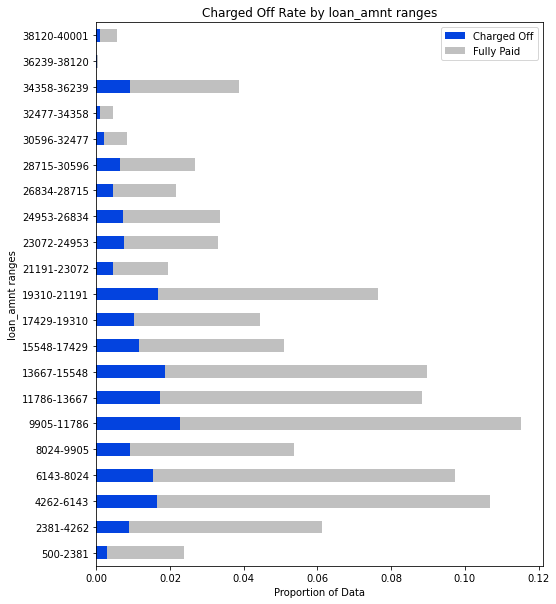

In [19]:
plot(num_rate_df, 'loan_amnt ranges', (8,10))

#### Term

In [20]:
cat_rate_df = get_cat_rate_df(df, 'term')
cat_rate_df

,term,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,36 months,0.154531,0.117433,0.642498,0.759931
1,60 months,0.320257,0.076884,0.163185,0.240069


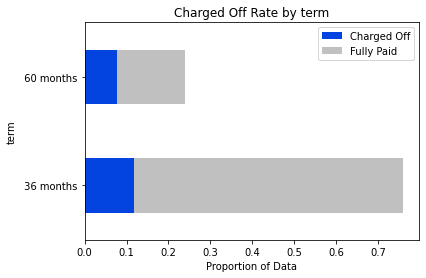

In [21]:
plot(cat_rate_df, 'term', (6,4))

#### Installment

In [22]:
df['installment'].describe()

count    1.156772e+06
mean     4.340155e+02
std      2.595520e+02
min      4.930000e+00
25%      2.469900e+02
50%      3.710700e+02
75%      5.733200e+02
max      1.719830e+03
Name: installment, dtype: float64

In [23]:
values = [x for x in range(4, 1720, 78)]
num_rate_df = get_num_rate_df(df, 'installment', values)
num_rate_df

,installment ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,4-82,0.122729,3.340330e-03,0.023877,0.027217
1,82-160,0.135842,1.059414e-02,0.067394,0.077989
2,160-238,0.158923,2.060907e-02,0.109071,0.129680
3,238-316,0.187900,2.869105e-02,0.124002,0.152693
4,316-394,0.207905,3.156110e-02,0.120244,0.151805
5,394-472,0.207852,1.996763e-02,0.076099,0.096066
6,472-550,0.222622,2.092634e-02,0.073073,0.094000
7,550-628,0.218501,1.423617e-02,0.050918,0.065154
8,628-706,0.217789,1.277866e-02,0.045896,0.058674
9,706-784,0.194962,7.680857e-03,0.031716,0.039397


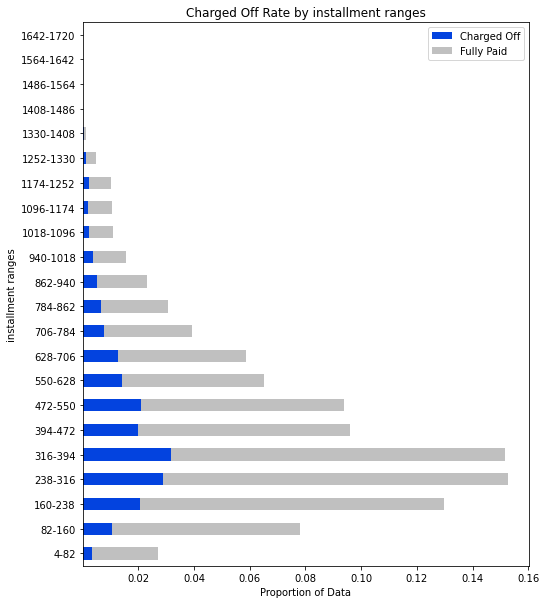

In [24]:
plot(num_rate_df, 'installment ranges', (8,10))

#### Grade

In [25]:
cat_rate_df = get_cat_rate_df(df, 'grade')
cat_rate_df = cat_rate_df.sort_values(by=['grade'])
cat_rate_df

,grade,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
3,1,0.057580,0.010221,0.167284,0.177505
1,2,0.130745,0.037758,0.251030,0.288788
0,3,0.219821,0.063935,0.226915,0.290850
5,4,0.297784,0.043897,0.103516,0.147413
4,5,0.380691,0.025494,0.041474,0.066968
2,6,0.446051,0.009949,0.012356,0.022305
6,7,0.496358,0.003063,0.003108,0.006171


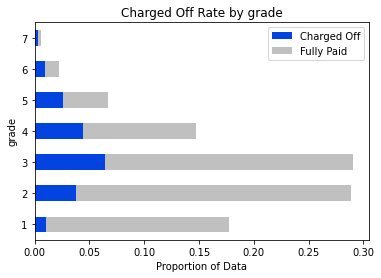

In [26]:
plot(cat_rate_df, 'grade', (6,4))

#### Employment Length

In [27]:
df['emp_length'].describe()

count    1.156772e+06
mean     5.967096e+00
std      3.693057e+00
min      0.000000e+00
25%      2.000000e+00
50%      6.000000e+00
75%      1.000000e+01
max      1.000000e+01
Name: emp_length, dtype: float64

In [28]:
values = [x for x in range(0, 11, 1)]
num_rate_df = get_num_rate_df(df, 'emp_length', values)
num_rate_df.at[10, 'emp_length ranges'] = '10+'
num_rate_df

,emp_length ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,0-1,0.204075,0.017379,0.067779,0.085158
1,1-2,0.205086,0.014368,0.055692,0.070060
2,2-3,0.197616,0.019050,0.077347,0.096397
3,3-4,0.198782,0.016902,0.068127,0.085029
4,4-5,0.196959,0.012485,0.050903,0.063388
5,5-6,0.195553,0.012933,0.053204,0.066137
6,6-7,0.193430,0.009534,0.039756,0.049291
7,7-8,0.194796,0.009106,0.037642,0.046748
8,8-9,0.196966,0.009430,0.038445,0.047875
9,9-10,0.198101,0.007971,0.032267,0.040239


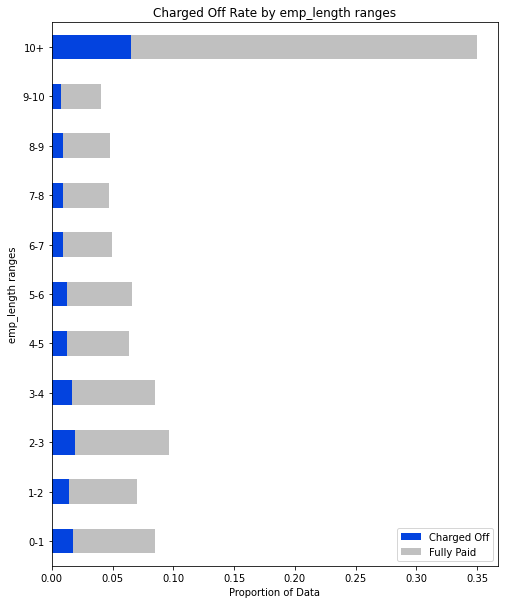

In [29]:
plot(num_rate_df, 'emp_length ranges', (8,10))

#### Home Ownership

In [30]:
cat_rate_df = get_cat_rate_df(df, 'home_ownership')
cat_rate_df

,home_ownership,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,MORTGAGE,0.167492,0.082767,0.411385,0.494152
1,RENT,0.226445,0.091125,0.311290,0.402416
2,OWN,0.197490,0.020368,0.082766,0.103134
3,ANY,0.196911,0.000044,0.000180,0.000224
4,NONE,0.153846,0.000005,0.000029,0.000034
5,OTHER,0.187500,0.000008,0.000034,0.000041


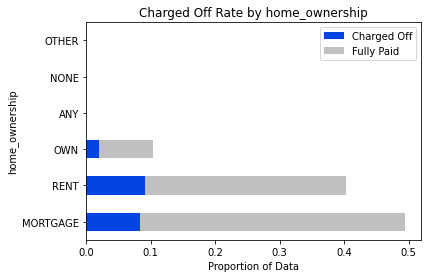

In [31]:
plot(cat_rate_df, 'home_ownership', (6,4))

#### Annual Income

In [32]:
df['annual_inc'].describe()

count    1.156772e+06
mean     7.754576e+04
std      7.142822e+04
min      3.300000e+01
25%      4.700000e+04
50%      6.500000e+04
75%      9.200000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

In [33]:
values = [x for x in range(0, 200000, 10000)]
num_rate_df = get_num_rate_df(df, 'annual_inc', values)
rate = df[(df['loan_status']==0)&(df['annual_inc']>=200000)].shape[0]\
                    / df[df['annual_inc']>=200000].shape[0]
proportion = df[df['annual_inc']>=200000].shape[0] / df.shape[0]
weighted_chargeoff_rate = rate*proportion
weighted_fullypaid_rate = (1-rate)*proportion
new_row = {'annual_inc ranges':'200000+',
           'Charged Off Rate': rate,
           'Weighted Charged Off Rate': weighted_chargeoff_rate,
           'Weighted Fully Paid Rate': weighted_fullypaid_rate,
           'Proportion': proportion}
num_rate_df = num_rate_df.append(new_row, ignore_index=True)
num_rate_df

,annual_inc ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,0-10000,0.197297,0.000063,0.000257,0.000320
1,10000-20000,0.202282,0.001410,0.005560,0.006970
2,20000-30000,0.224184,0.008924,0.030882,0.039806
3,30000-40000,0.227043,0.021731,0.073983,0.095714
4,40000-50000,0.217898,0.028585,0.102599,0.131184
5,50000-60000,0.207246,0.027672,0.105850,0.133522
6,60000-70000,0.201680,0.025577,0.101244,0.126821
7,70000-80000,0.191446,0.020009,0.084507,0.104516
8,80000-90000,0.185447,0.015600,0.068523,0.084123
9,90000-100000,0.173834,0.011096,0.052733,0.063828


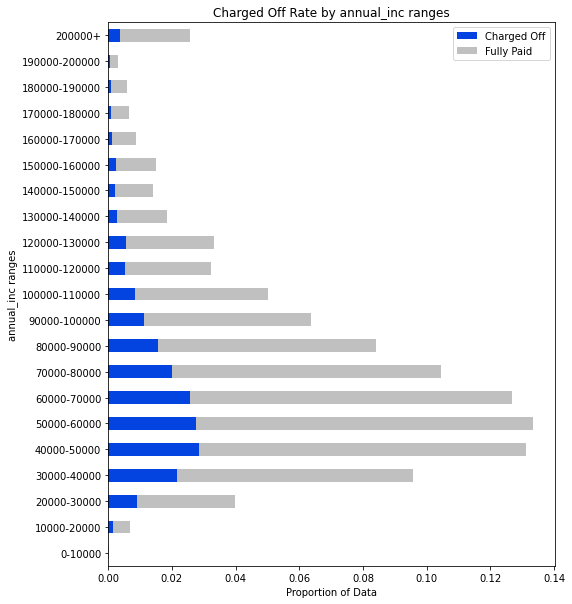

In [34]:
plot(num_rate_df, 'annual_inc ranges', (8,10))

#### Verification Status

In [35]:
cat_rate_df = get_cat_rate_df(df, 'verification_status')
cat_rate_df

,verification_status,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,Not Verified,0.143647,0.044995,0.268239,0.313234
1,Source Verified,0.206892,0.084001,0.322012,0.406013
2,Verified,0.232662,0.065321,0.215432,0.280753


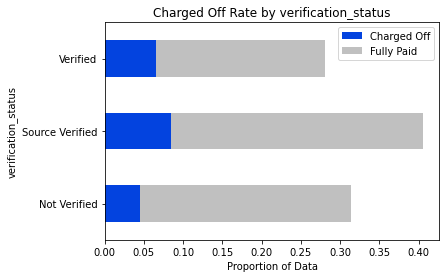

In [36]:
plot(cat_rate_df, 'verification_status', (6,4))

#### Purpose

In [37]:
cat_rate_df = get_cat_rate_df(df, 'purpose')
cat_rate_df

,purpose,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,debt_consolidation,0.206195,0.119559,0.460275,0.579833
1,small_business,0.293174,0.003223,0.007770,0.010993
2,home_improvement,0.171846,0.011043,0.053217,0.064260
3,major_purchase,0.181937,0.003981,0.017900,0.021881
4,credit_card,0.163643,0.036052,0.184257,0.220309
5,other,0.205559,0.012039,0.046527,0.058566
6,house,0.217078,0.001147,0.004137,0.005285
7,car,0.141972,0.001545,0.009336,0.010881
8,medical,0.208243,0.002420,0.009200,0.011619
9,vacation,0.185953,0.001279,0.005601,0.006880


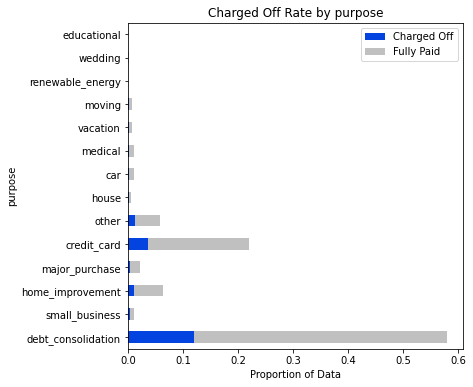

In [38]:
plot(cat_rate_df, 'purpose', (6,6))

#### State

In [39]:
cat_rate_df = get_cat_rate_df(df, 'addr_state')
cat_rate_df = cat_rate_df.sort_values(by=['Charged Off Rate'], ascending=False)
cat_rate_df

,addr_state,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
50,IA,0.333333,8.644746e-07,0.000002,0.000003
44,MS,0.248198,1.220638e-03,0.003697,0.004918
33,NE,0.240712,6.665099e-04,0.002102,0.002769
35,AR,0.236529,1.734136e-03,0.005597,0.007332
40,OK,0.230541,2.084248e-03,0.006956,0.009041
17,AL,0.227493,2.756809e-03,0.009361,0.012118
20,LA,0.225607,2.612442e-03,0.008967,0.011580
13,NY,0.216849,1.767418e-02,0.063830,0.081504
1,SD,0.212618,4.486623e-04,0.001662,0.002110
16,NM,0.211535,1.135055e-03,0.004231,0.005366


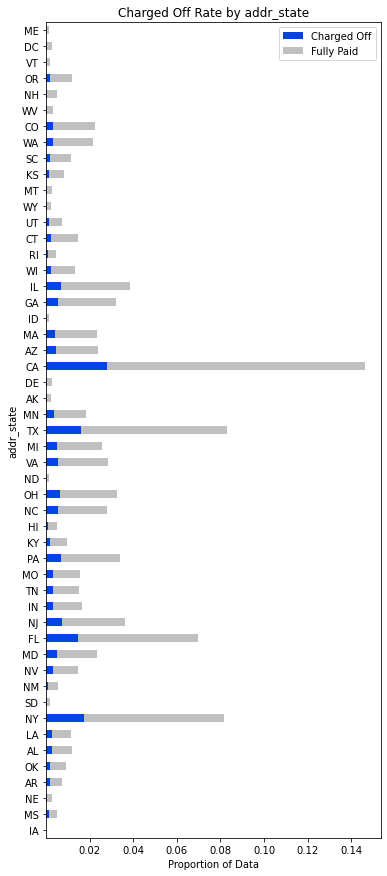

In [40]:
plot(cat_rate_df, 'addr_state', (6,15))

#### Debt to Income Ratio

In [41]:
df['dti'].describe()

count    1.156772e+06
mean     1.814050e+01
std      9.615304e+00
min     -1.000000e+00
25%      1.176000e+01
50%      1.753000e+01
75%      2.393000e+01
max      9.990000e+02
Name: dti, dtype: float64

In [42]:
values = [x for x in range(-1, 49, 2)]
num_rate_df = get_num_rate_df(df, 'dti', values)
rate = df[(df['loan_status']==0)&(df['dti']>=49)].shape[0]\
                    / df[df['dti']>=49].shape[0]
proportion = df[df['dti']>=49].shape[0] / df.shape[0]
weighted_chargeoff_rate = rate*proportion
weighted_fullypaid_rate = (1-rate)*proportion
new_row = {'dti ranges':'49+',
           'Charged Off Rate': rate,
           'Weighted Charged Off Rate': weighted_chargeoff_rate,
           'Weighted Fully Paid Rate': weighted_fullypaid_rate,
           'Proportion': proportion}
num_rate_df = num_rate_df.append(new_row, ignore_index=True)
num_rate_df

,dti ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,-1-1,0.150828,0.000661,0.003723,0.004385
1,1-3,0.144460,0.002382,0.014110,0.016492
2,3-5,0.141583,0.004089,0.024791,0.028880
3,5-7,0.143596,0.006191,0.036925,0.043117
4,7-9,0.144743,0.008219,0.048562,0.056780
5,9-11,0.152841,0.010726,0.059449,0.070175
6,11-13,0.159550,0.012950,0.068215,0.081165
7,13-15,0.167997,0.014686,0.072731,0.087417
8,15-17,0.178836,0.015753,0.072335,0.088088
9,17-19,0.188767,0.016349,0.070260,0.086609


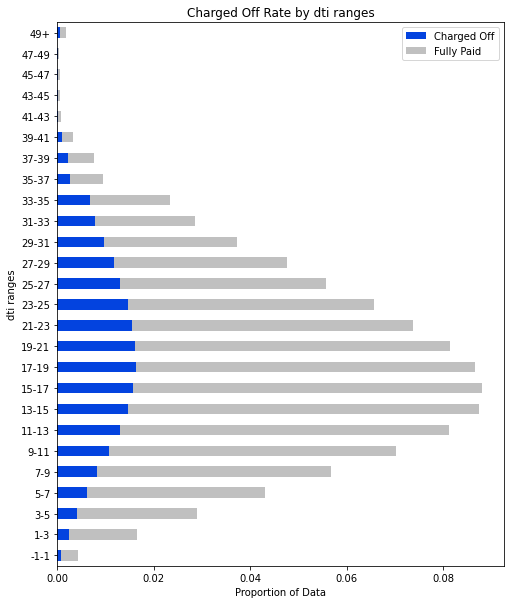

In [43]:
plot(num_rate_df, 'dti ranges', (8,10))

#### Delinquencies in last 2 years

In [44]:
cat_rate_df = get_cat_rate_df(df, 'delinq_2yrs')
cat_rate_df = cat_rate_df.sort_values(by=['delinq_2yrs'], ascending=False)
cat_rate_df

,delinq_2yrs,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
25,39.0,0.000000,0.000000e+00,8.644746e-07,8.644746e-07
16,30.0,0.000000,0.000000e+00,8.644746e-07,8.644746e-07
29,29.0,0.000000,0.000000e+00,1.728949e-06,1.728949e-06
26,28.0,0.000000,0.000000e+00,8.644746e-07,8.644746e-07
23,27.0,1.000000,8.644746e-07,0.000000e+00,8.644746e-07
20,26.0,0.000000,0.000000e+00,2.593424e-06,2.593424e-06
27,25.0,0.500000,8.644746e-07,8.644746e-07,1.728949e-06
30,24.0,0.000000,0.000000e+00,8.644746e-07,8.644746e-07
22,22.0,0.000000,0.000000e+00,2.593424e-06,2.593424e-06
28,21.0,0.250000,8.644746e-07,2.593424e-06,3.457898e-06


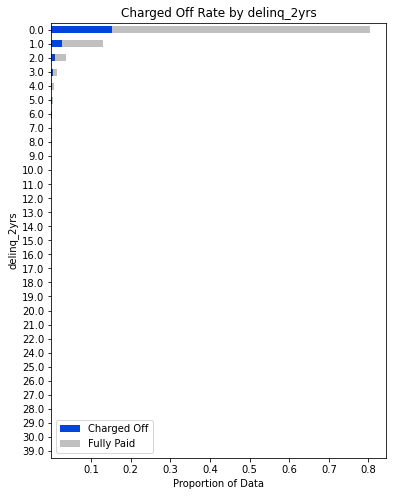

In [45]:
plot(cat_rate_df, 'delinq_2yrs', (6,8))

#### Inquiries in last 6 months

In [46]:
cat_rate_df = get_cat_rate_df(df, 'inq_last_6mths')
cat_rate_df = cat_rate_df.sort_values(by=['inq_last_6mths'], ascending=False)
cat_rate_df

,inq_last_6mths,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
8,8.0,0.153846,0.000002,0.000010,0.000011
7,7.0,0.210526,0.000003,0.000013,0.000016
6,6.0,0.233766,0.000156,0.000510,0.000666
5,5.0,0.272727,0.000973,0.002593,0.003566
1,4.0,0.273726,0.002778,0.007370,0.010147
3,3.0,0.257550,0.009636,0.027779,0.037415
4,2.0,0.235074,0.023782,0.077385,0.101167
0,1.0,0.208277,0.057266,0.217686,0.274952
2,0.0,0.174320,0.099721,0.472338,0.572059


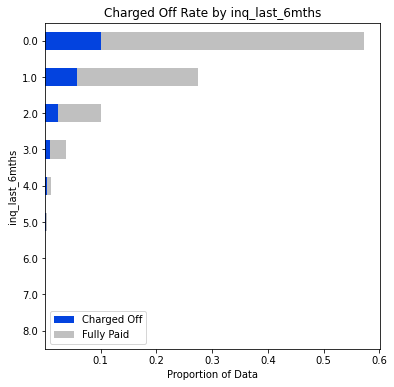

In [47]:
plot(cat_rate_df, 'inq_last_6mths', (6,6))

#### Open Accounts

In [48]:
df['open_acc'].describe()

count    1.156772e+06
mean     1.168119e+01
std      5.504233e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      9.000000e+01
Name: open_acc, dtype: float64

In [49]:
values = [x for x in range(1, 41, 5)]
num_rate_df = get_num_rate_df(df, 'open_acc', values)
rate = df[(df['loan_status']==0)&(df['open_acc']>=41)].shape[0]\
                    / df[df['open_acc']>=41].shape[0]
proportion = df[df['open_acc']>=41].shape[0] / df.shape[0]
weighted_chargeoff_rate = rate*proportion
weighted_fullypaid_rate = (1-rate)*proportion
new_row = {'open_acc ranges':'41+',
           'Charged Off Rate': rate,
           'Weighted Charged Off Rate': weighted_chargeoff_rate,
           'Weighted Fully Paid Rate': weighted_fullypaid_rate,
           'Proportion': proportion}
num_rate_df = num_rate_df.append(new_row, ignore_index=True)
num_rate_df

,open_acc ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,1-6,0.174153,0.015095,0.071584,0.086679
1,6-11,0.185753,0.073812,0.323556,0.397369
2,11-16,0.199747,0.062615,0.250855,0.313470
3,16-21,0.205803,0.027378,0.105652,0.133030
4,21-26,0.216372,0.010168,0.036825,0.046993
5,26-31,0.231865,0.003432,0.011370,0.014802
6,31-36,0.231777,0.001163,0.003854,0.005017
7,36-41,0.237901,0.000404,0.001293,0.001697
8,41+,0.264410,0.000250,0.000695,0.000945


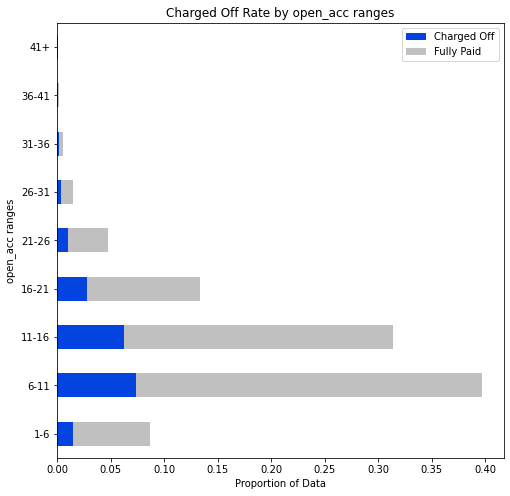

In [50]:
plot(num_rate_df, 'open_acc ranges', (8,8))

#### Derogitory Marks in Public Record

In [51]:
df['pub_rec'].describe()

count    1.156772e+06
mean     2.145349e-01
std      5.975281e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.300000e+01
Name: pub_rec, dtype: float64

In [52]:
values = [x for x in range(0, 10, 1)]
num_rate_df = get_num_rate_df(df, 'pub_rec', values)
rate = df[(df['loan_status']==0)&(df['pub_rec']>=10)].shape[0]\
                    / df[df['pub_rec']>=10].shape[0]
proportion = df[df['pub_rec']>=41].shape[0] / df.shape[0]
weighted_chargeoff_rate = rate*proportion
weighted_fullypaid_rate = (1-rate)*proportion
new_row = {'pub_rec ranges':'10+',
           'Charged Off Rate': rate,
           'Weighted Charged Off Rate': weighted_chargeoff_rate,
           'Weighted Fully Paid Rate': weighted_fullypaid_rate,
           'Proportion': proportion}
num_rate_df = num_rate_df.append(new_row, ignore_index=True)
num_rate_df

,pub_rec ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,0-1,0.188949,0.157081,0.674261,0.831342
1,1-2,0.218958,0.030878,0.110145,0.141023
2,2-3,0.231667,0.004220,0.013994,0.018214
3,3-4,0.220844,0.001216,0.004291,0.005508
4,4-5,0.245283,0.000483,0.001487,0.001970
5,5-6,0.228151,0.000214,0.000725,0.000940
6,6-7,0.248175,0.000118,0.000356,0.000474
7,7-8,0.203320,0.000042,0.000166,0.000208
8,8-9,0.169231,0.000019,0.000093,0.000112
9,9-10,0.205882,0.000012,0.000047,0.000059


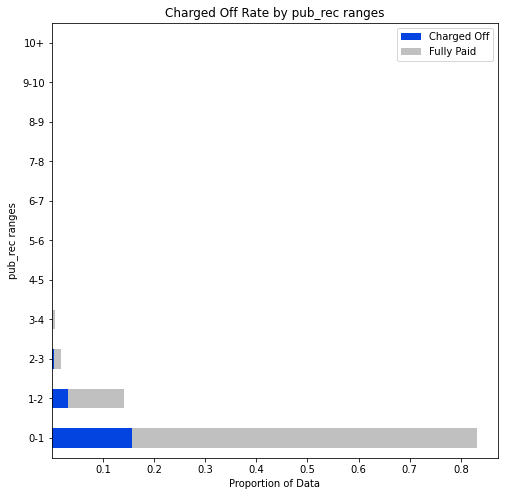

In [53]:
plot(num_rate_df, 'pub_rec ranges', (8,8))

#### Revolving Balance

In [54]:
df['revol_bal'].describe()

count    1.156772e+06
mean     1.618298e+04
std      2.234768e+04
min      0.000000e+00
25%      5.945000e+03
50%      1.107300e+04
75%      1.959300e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

In [55]:
values = [x for x in range(0, 50000, 5000)]
num_rate_df = get_num_rate_df(df, 'revol_bal', values)
rate = df[(df['loan_status']==0)&(df['revol_bal']>=50000)].shape[0]\
                    / df[df['revol_bal']>=50000].shape[0]
proportion = df[df['revol_bal']>=50000].shape[0] / df.shape[0]
weighted_chargeoff_rate = rate*proportion
weighted_fullypaid_rate = (1-rate)*proportion
new_row = {'revol_bal ranges':'50000+',
           'Charged Off Rate': rate,
           'Weighted Charged Off Rate': weighted_chargeoff_rate,
           'Weighted Fully Paid Rate': weighted_fullypaid_rate,
           'Proportion': proportion}
num_rate_df = num_rate_df.append(new_row, ignore_index=True)
num_rate_df

,revol_bal ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,0-5000,0.190780,0.037842,0.160510,0.198352
1,5000-10000,0.196306,0.050127,0.205226,0.255354
2,10000-15000,0.201498,0.037370,0.148089,0.185458
3,15000-20000,0.203383,0.024108,0.094426,0.118533
4,20000-25000,0.199191,0.015024,0.060400,0.075424
5,25000-30000,0.190390,0.009501,0.040404,0.049905
6,30000-35000,0.188473,0.006344,0.027314,0.033657
7,35000-40000,0.180913,0.004115,0.018630,0.022745
8,40000-45000,0.177131,0.002688,0.012486,0.015173
9,45000-50000,0.174428,0.001872,0.008858,0.010730


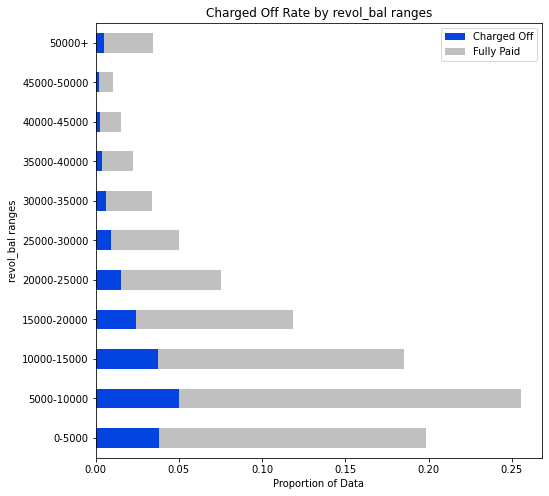

In [56]:
plot(num_rate_df, 'revol_bal ranges', (8,8))

#### Revolving Balance Utilization

In [57]:
df['revol_util'].describe()

count    1.156772e+06
mean     5.177143e+01
std      2.447262e+01
min      0.000000e+00
25%      3.340000e+01
50%      5.200000e+01
75%      7.060000e+01
max      8.923000e+02
Name: revol_util, dtype: float64

In [58]:
values = [x for x in range(0, 100, 10)]
num_rate_df = get_num_rate_df(df, 'revol_util', values)
rate = df[(df['loan_status']==0)&(df['revol_util']>=100)].shape[0]\
                    / df[df['revol_util']>=100].shape[0]
proportion = df[df['revol_util']>=100].shape[0] / df.shape[0]
weighted_chargeoff_rate = rate*proportion
weighted_fullypaid_rate = (1-rate)*proportion
new_row = {'revol_util ranges':'100+',
           'Charged Off Rate': rate,
           'Weighted Charged Off Rate': weighted_chargeoff_rate,
           'Weighted Fully Paid Rate': weighted_fullypaid_rate,
           'Proportion': proportion}
num_rate_df = num_rate_df.append(new_row, ignore_index=True)
num_rate_df

,revol_util ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,0-10,0.141213,0.006597,0.040119,0.046715
1,10-20,0.145658,0.009653,0.056617,0.066270
2,20-30,0.165059,0.015901,0.080435,0.096336
3,30-40,0.182031,0.022571,0.101423,0.123993
4,40-50,0.195141,0.026717,0.110193,0.136909
5,50-60,0.205031,0.028824,0.111760,0.140584
6,60-70,0.211589,0.027631,0.102958,0.130589
7,70-80,0.214959,0.024062,0.087875,0.111936
8,80-90,0.217371,0.018688,0.067286,0.085974
9,90-100,0.223291,0.012678,0.044101,0.056780


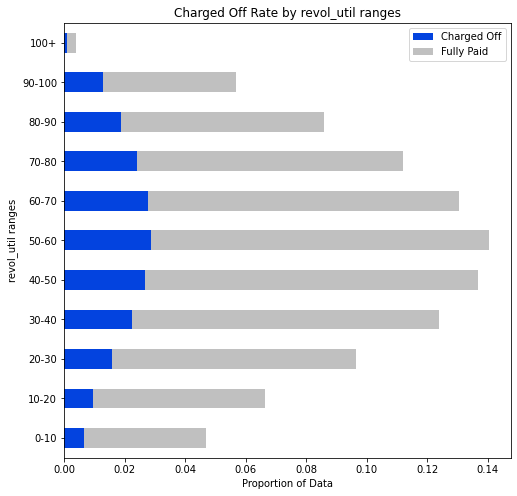

In [59]:
plot(num_rate_df, 'revol_util ranges', (8,8))

#### Total Accounts

In [60]:
df['total_acc'].describe()

count    1.156772e+06
mean     2.501253e+01
std      1.202462e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.300000e+01
75%      3.200000e+01
max      1.760000e+02
Name: total_acc, dtype: float64

In [61]:
values = [x for x in range(0, 50, 5)]
num_rate_df = get_num_rate_df(df, 'total_acc', values)
rate = df[(df['loan_status']==0)&(df['total_acc']>=50)].shape[0]\
                    / df[df['total_acc']>=50].shape[0]
proportion = df[df['total_acc']>=50].shape[0] / df.shape[0]
weighted_chargeoff_rate = rate*proportion
weighted_fullypaid_rate = (1-rate)*proportion
new_row = {'total_acc ranges':'50+',
           'Charged Off Rate': rate,
           'Weighted Charged Off Rate': weighted_chargeoff_rate,
           'Weighted Fully Paid Rate': weighted_fullypaid_rate,
           'Proportion': proportion}
num_rate_df = num_rate_df.append(new_row, ignore_index=True)
num_rate_df

,total_acc ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,0-5,0.227936,0.001081,0.003660,0.004741
1,5-10,0.204362,0.011900,0.046332,0.058232
2,10-15,0.203406,0.026464,0.103641,0.130105
3,15-20,0.197619,0.033987,0.137994,0.171981
4,20-25,0.192441,0.034113,0.143152,0.177265
5,25-30,0.189982,0.028684,0.122299,0.150983
6,30-35,0.187385,0.021183,0.091863,0.113046
7,35-40,0.186682,0.014337,0.062463,0.076801
8,40-45,0.190018,0.009314,0.039702,0.049016
9,45-50,0.192815,0.005651,0.023657,0.029308


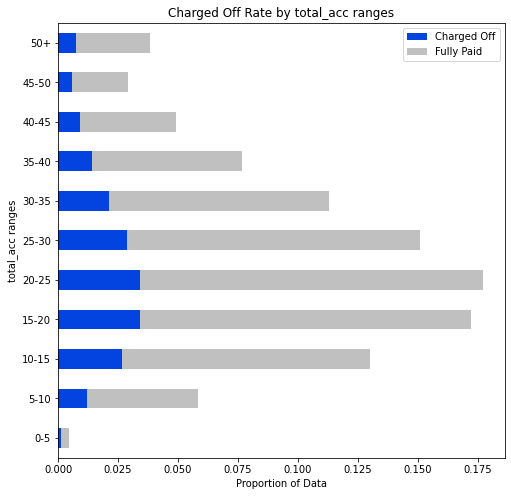

In [62]:
plot(num_rate_df, 'total_acc ranges', (8,8))

#### Application Type

In [63]:
cat_rate_df = get_cat_rate_df(df, 'application_type')
cat_rate_df

,application_type,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,Individual,0.193641,0.190156,0.791847,0.982003
1,Joint App,0.231194,0.004161,0.013836,0.017997


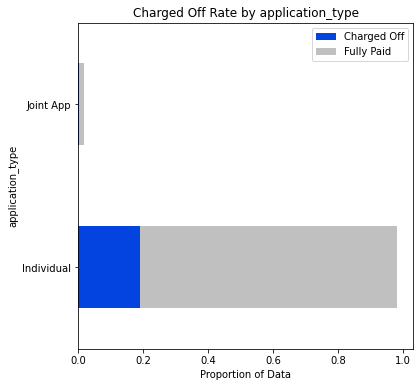

In [64]:
plot(cat_rate_df, 'application_type', (6,6))

#### FICO Score

In [65]:
df['fico'].describe()

count    1.156772e+06
mean     6.978662e+02
std      3.163905e+01
min      6.620000e+02
25%      6.720000e+02
50%      6.920000e+02
75%      7.120000e+02
max      8.475000e+02
Name: fico, dtype: float64

In [66]:
values = [x for x in range(660, 800, 10)]
num_rate_df = get_num_rate_df(df, 'fico', values)
rate = df[(df['loan_status']==0)&(df['fico']>=800)].shape[0]\
                    / df[df['fico']>=800].shape[0]
proportion = df[df['fico']>=800].shape[0] / df.shape[0]
weighted_chargeoff_rate = rate*proportion
weighted_fullypaid_rate = (1-rate)*proportion
new_row = {'fico ranges':'800+',
           'Charged Off Rate': rate,
           'Weighted Charged Off Rate': weighted_chargeoff_rate,
           'Weighted Fully Paid Rate': weighted_fullypaid_rate,
           'Proportion': proportion}
num_rate_df = num_rate_df.append(new_row, ignore_index=True)
num_rate_df

,fico ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,660-670,0.255448,0.045477,0.132550,0.178026
1,670-680,0.235312,0.039047,0.126892,0.165939
2,680-690,0.217225,0.031531,0.113622,0.145153
3,690-700,0.197965,0.024808,0.100506,0.125314
4,700-710,0.178190,0.018287,0.084340,0.102627
5,710-720,0.155952,0.012461,0.067439,0.079900
6,720-730,0.140451,0.008123,0.049715,0.057839
7,730-740,0.124965,0.004977,0.034849,0.039825
8,740-750,0.113256,0.003195,0.025016,0.028211
9,750-760,0.098577,0.002114,0.019328,0.021442


In [67]:
values = [x for x in range(660, 830, 10)]
num_rate_df = get_num_rate_df(df, 'fico', values)
rate = df[(df['loan_status']==0)&(df['fico']>=830)].shape[0]\
                    / df[df['fico']>=830].shape[0]
proportion = df[df['fico']>=830].shape[0] / df.shape[0]
weighted_chargeoff_rate = rate*proportion
weighted_fullypaid_rate = (1-rate)*proportion
new_row = {'fico ranges':'830+',
           'Charged Off Rate': rate,
           'Weighted Charged Off Rate': weighted_chargeoff_rate,
           'Weighted Fully Paid Rate': weighted_fullypaid_rate,
           'Proportion': proportion}
num_rate_df = num_rate_df.append(new_row, ignore_index=True)
num_rate_df

,fico ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,660-670,0.255448,0.045477,0.132550,0.178026
1,670-680,0.235312,0.039047,0.126892,0.165939
2,680-690,0.217225,0.031531,0.113622,0.145153
3,690-700,0.197965,0.024808,0.100506,0.125314
4,700-710,0.178190,0.018287,0.084340,0.102627
5,710-720,0.155952,0.012461,0.067439,0.079900
6,720-730,0.140451,0.008123,0.049715,0.057839
7,730-740,0.124965,0.004977,0.034849,0.039825
8,740-750,0.113256,0.003195,0.025016,0.028211
9,750-760,0.098577,0.002114,0.019328,0.021442


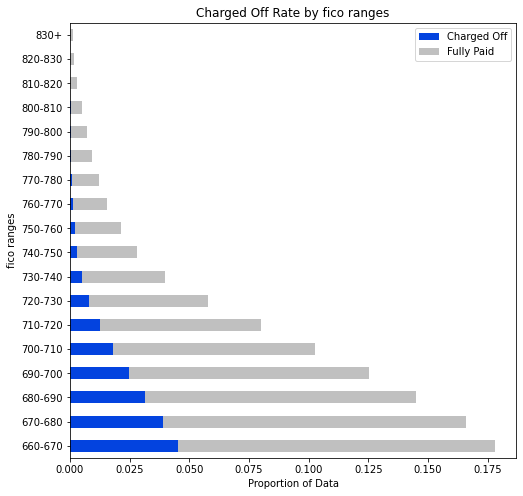

In [68]:
plot(num_rate_df, 'fico ranges', (8,8))

#### Months with Credit Line

In [69]:
df['months_cr_line'].describe()

count    1.156772e+06
mean     1.910901e+02
std      8.659279e+01
min      3.500000e+01
25%      1.330000e+02
50%      1.740000e+02
75%      2.360000e+02
max      9.990000e+02
Name: months_cr_line, dtype: float64

In [70]:
values = [x for x in range(35, 435, 20)]
num_rate_df = get_num_rate_df(df, 'months_cr_line', values)
rate = df[(df['loan_status']==0)&(df['months_cr_line']>=435)].shape[0]\
                    / df[df['months_cr_line']>=435].shape[0]
proportion = df[df['months_cr_line']>=435].shape[0] / df.shape[0]
weighted_chargeoff_rate = rate*proportion
weighted_fullypaid_rate = (1-rate)*proportion
new_row = {'months_cr_line ranges':'435+',
           'Charged Off Rate': rate,
           'Weighted Charged Off Rate': weighted_chargeoff_rate,
           'Weighted Fully Paid Rate': weighted_fullypaid_rate,
           'Proportion': proportion}
num_rate_df = num_rate_df.append(new_row, ignore_index=True)
num_rate_df

,months_cr_line ranges,Charged Off Rate,Weighted Charged Off Rate,Weighted Fully Paid Rate,Proportion
0,35-55,0.239675,0.005247,0.016646,0.021894
1,55-75,0.223227,0.006937,0.024140,0.031078
2,75-95,0.211190,0.009401,0.035114,0.044515
3,95-115,0.208383,0.012937,0.049145,0.062082
4,115-135,0.218727,0.021621,0.077230,0.098851
5,135-155,0.204401,0.025187,0.098037,0.123225
6,155-175,0.196150,0.023368,0.095764,0.119132
7,175-195,0.190152,0.018762,0.079905,0.098667
8,195-215,0.187140,0.014932,0.064859,0.079791
9,215-235,0.183497,0.012320,0.054822,0.067143


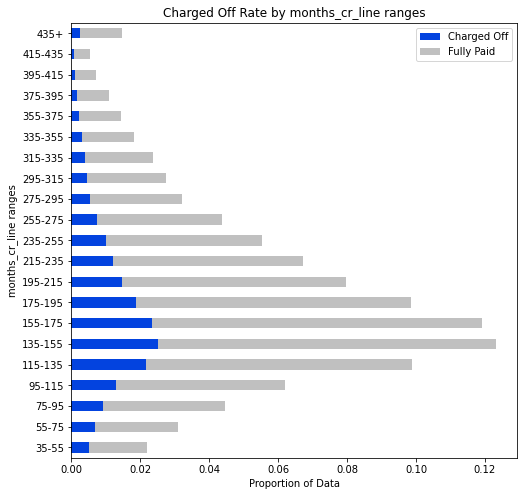

In [71]:
plot(num_rate_df, 'months_cr_line ranges', (8,8))

## Key Findings

- Unbalanced Dataset. Only 19% of loans were charged off
- Several variables have outliers; annual income, dti, delinq_2yrs, open_acc, revol_bal, revol_util, total_acc, months_cr_line
- Several variables have skew; installment, annual_inc, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, fico, months_cr_line
- 60 month loans are about twice as likely to be charged off as 36 month loans
- Loans with higher monthly installments are more likely to be charged off
- Lower loan grades have higher likelihood of being charged off
- Annual incomes over 190,000 have the lowest rate of being charged off
- Borrowers with higher debt-to-income ratios are more likely to have their loans charged off
- The higher the FICO score, the less likely for the loan to be charged off

In [72]:
df.to_csv('final_dataset.csv', index=False)